In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

df = pd.read_csv(r'C:\Users\agrand6\Desktop\UIC\Code\house_prices\train.csv')


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(df.isnull().sum().sort_values(ascending=False))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


<AxesSubplot:>

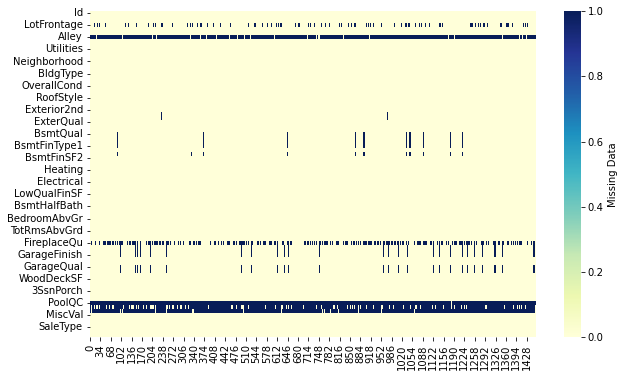

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [6]:
#checking where SalePrice is NA
df['SalePrice'].isnull().sum()



0

In [7]:
# dropping all the rows where SalePrice is NA.

#target = 'SalePrice'
#df.dropna(axis =0, subset = [target], inplace = True)

def missingValuesInfo(x):
    total = x.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(x)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]


In [8]:
missingValuesInfo(df)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [9]:
# removing the columns which have empty values > 70%

df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace = True)


<AxesSubplot:>

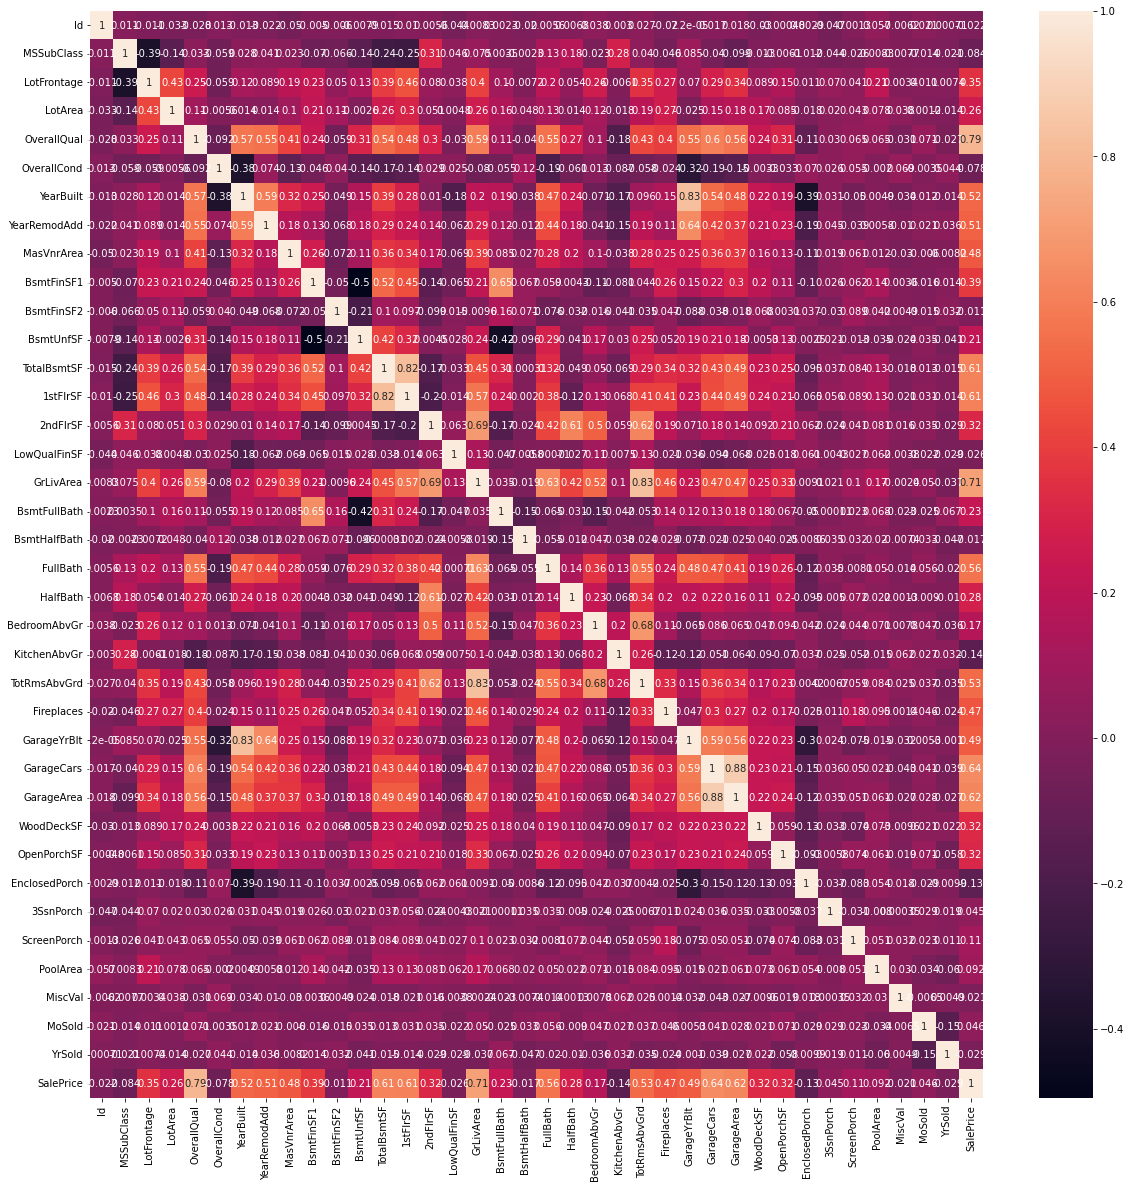

In [10]:

df.shape

df.head()

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot= True)


In [11]:

#Here we can see some strong corelation between variables such as Garage Year built, Year built; Total basment sqft, First floor sq ft, Garage Cars, garage area.

#This correlation is so strong that it can indicate a situation of multicollinearity.

#If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

for a in range(len(df.corr().columns)):
    for b in range(a):
        if(abs(df.corr().iloc[a,b])>0.7):
            print(df.corr().columns[a],"-", df.corr().columns[b])
            #print(df.corr().columns)


1stFlrSF - TotalBsmtSF
TotRmsAbvGrd - GrLivArea
GarageYrBlt - YearBuilt
GarageArea - GarageCars
SalePrice - OverallQual
SalePrice - GrLivArea


In [12]:

#These columns are the most corelated. We can drop one of each of the columns to avoid multi collenarity.

df.drop(['TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd'], axis=1, inplace=True)

df.shape


(1460, 73)

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

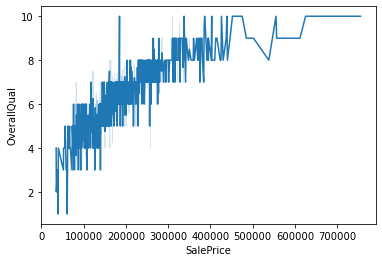

In [13]:

sns.lineplot(data=df, x="SalePrice", y= "OverallQual")

C:\Users\agrand6\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


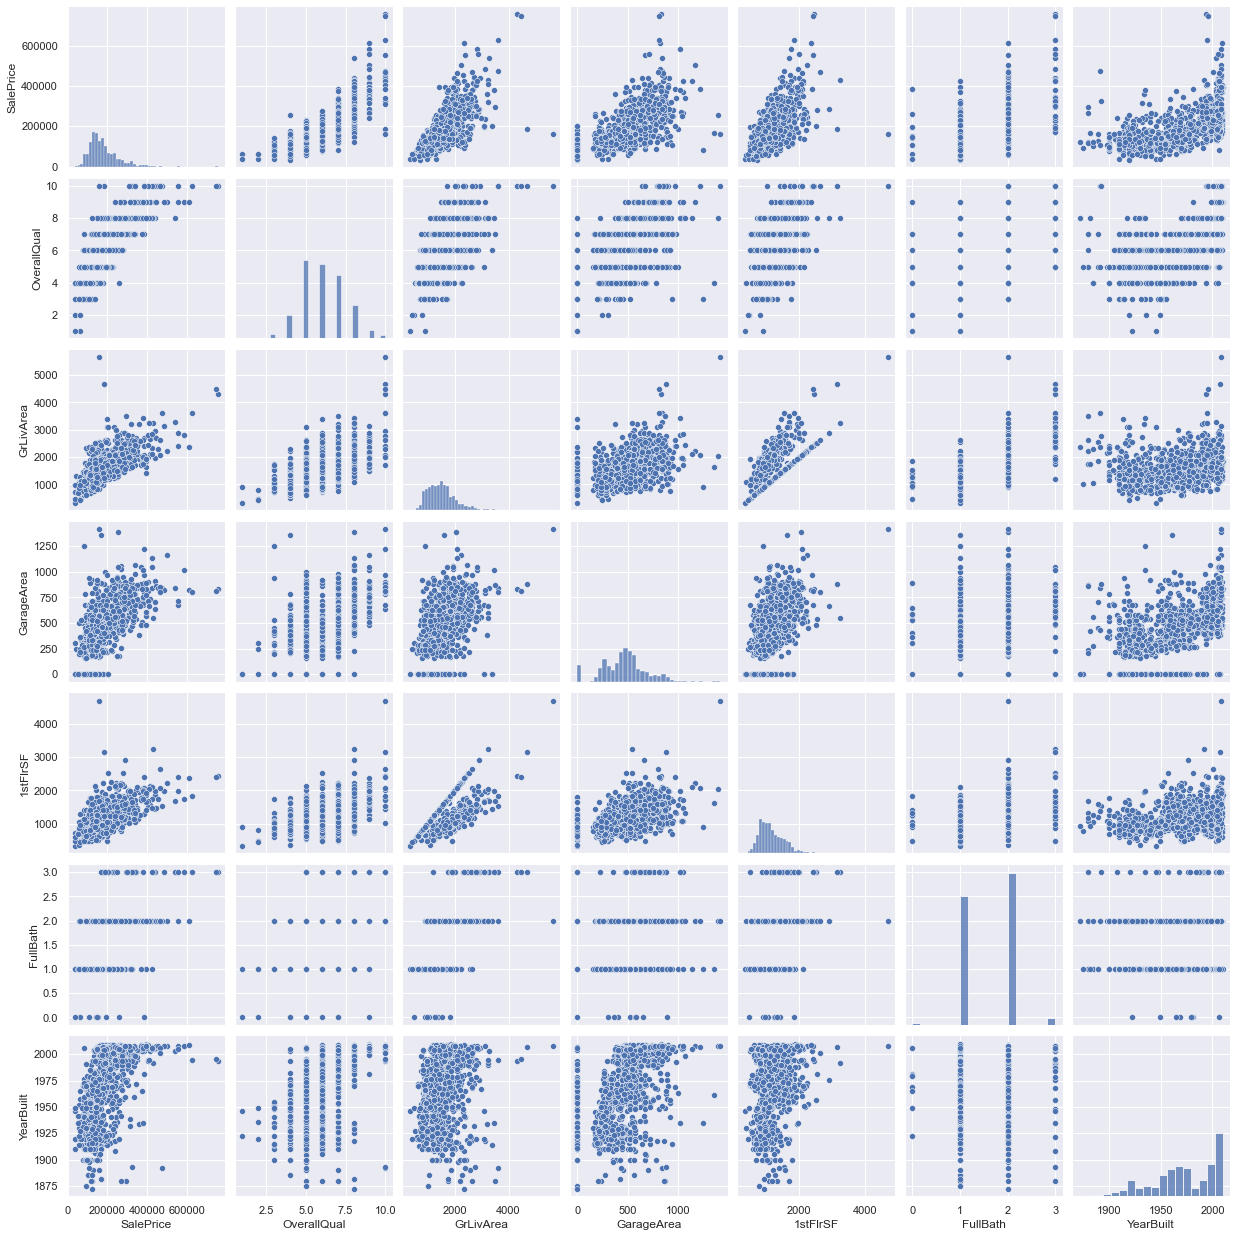

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

<AxesSubplot:>

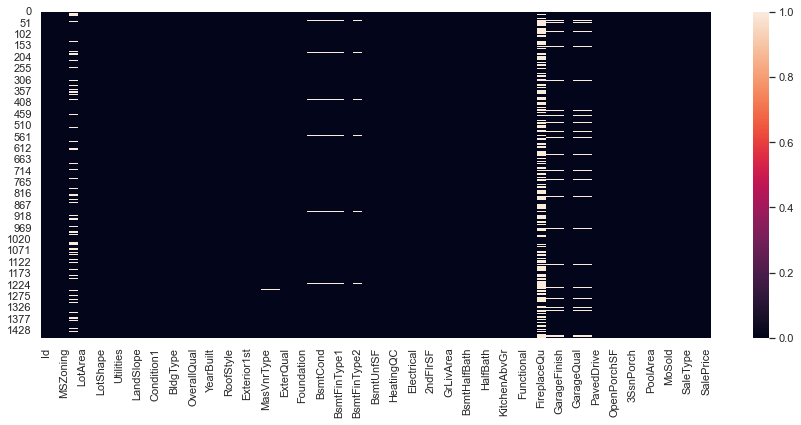

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

In [16]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [17]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])


In [18]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 73, dtype: int64

In [19]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [20]:
missingValuesInfo(df)

,Total,Percent
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53
MasVnrArea,8,0.55


In [21]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageQual'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageCond'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [22]:
missingValuesInfo(df)

,Total,Percent
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtCond,37,2.53
BsmtFinType1,37,2.53
BsmtQual,37,2.53
MasVnrType,8,0.55
MasVnrArea,8,0.55
Electrical,1,0.07


In [23]:
#df.dtypes['BsmtFinType2']
#df.dtypes['BsmtExposure']
#df.dtypes['BsmtCond']
#df.dtypes['BsmtQual']
#df.dtypes['MasVnrType']
#df.dtypes['Electrical']
#df.dtypes['MSSubClass']

In [24]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


<AxesSubplot:>

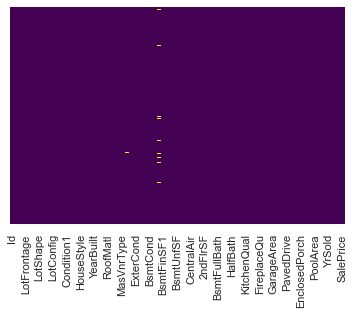

In [25]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
missingValuesInfo(df)

,Total,Percent
BsmtFinType1,37,2.53
MasVnrArea,8,0.55


In [27]:
#df.dtypes['BsmtFinType1']
df.dtypes['MasVnrArea']

dtype('float64')

In [28]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

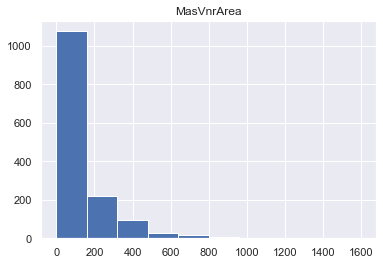

In [29]:
df.hist(column='MasVnrArea');

In [30]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

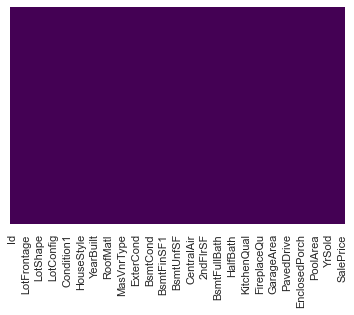

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
df.shape

(1460, 73)

In [33]:
df.drop(['Id'], axis=1, inplace = True)

In [34]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [35]:
## Here each of the categorical variables has more than 2 categories. 
## Hence, it is better to use dummy variables and create new varaibles, rather than using as.numeric 

In [36]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [37]:
len(cat_cols)

39

In [38]:
## create dummies

In [39]:
scam_df = pd.get_dummies(df, columns=cat_cols)

In [40]:
scam_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
non_dummy_cols = list(set(df.columns) - set(cat_cols))

In [42]:
non_dummy_cols

['HalfBath',
 'YearRemodAdd',
 'WoodDeckSF',
 'FullBath',
 '3SsnPorch',
 'EnclosedPorch',
 'MSSubClass',
 'ScreenPorch',
 'MiscVal',
 'BsmtFullBath',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'BsmtHalfBath',
 'MoSold',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'GarageArea',
 'OverallCond',
 'SalePrice',
 'BsmtFinSF1',
 'GrLivArea',
 'MasVnrArea',
 'BedroomAbvGr',
 'OverallQual',
 'YrSold',
 '2ndFlrSF',
 'LowQualFinSF',
 '1stFlrSF',
 'OpenPorchSF',
 'PoolArea',
 'Fireplaces',
 'KitchenAbvGr']

In [43]:
len(non_dummy_cols) 
# 33 is total (72) - cat_cols (39)

33

In [44]:
df[non_dummy_cols]

,HalfBath,YearRemodAdd,WoodDeckSF,FullBath,3SsnPorch,EnclosedPorch,MSSubClass,ScreenPorch,MiscVal,BsmtFullBath,...,BedroomAbvGr,OverallQual,YrSold,2ndFlrSF,LowQualFinSF,1stFlrSF,OpenPorchSF,PoolArea,Fireplaces,KitchenAbvGr
0,1,2003,0,2,0,0,60,0,0,1,...,3,7,2008,854,0,856,61,0,0,1
1,0,1976,298,2,0,0,20,0,0,0,...,3,6,2007,0,0,1262,0,0,1,1
2,1,2002,0,2,0,0,60,0,0,1,...,3,7,2008,866,0,920,42,0,1,1
3,0,1970,0,1,0,272,70,0,0,1,...,3,7,2006,756,0,961,35,0,1,1
4,1,2000,192,2,0,0,60,0,0,1,...,4,8,2008,1053,0,1145,84,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,2000,0,2,0,0,60,0,0,0,...,3,6,2007,694,0,953,40,0,1,1
1456,0,1988,349,2,0,0,20,0,0,1,...,3,6,2010,0,0,2073,0,0,2,1
1457,0,2006,0,2,0,0,70,0,2500,0,...,4,7,2010,1152,0,1188,60,0,2,1
1458,0,1996,366,1,0,112,20,0,0,1,...,2,5,2010,0,0,1078,0,0,0,1


In [45]:
scam_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [46]:
final_df = pd.concat([df[non_dummy_cols], scam_df] , axis =1)
print(final_df)

      HalfBath  YearRemodAdd  WoodDeckSF  FullBath  3SsnPorch  EnclosedPorch  \
0            1          2003           0         2          0              0   
1            0          1976         298         2          0              0   
2            1          2002           0         2          0              0   
3            0          1970           0         1          0            272   
4            1          2000         192         2          0              0   
...        ...           ...         ...       ...        ...            ...   
1455         1          2000           0         2          0              0   
1456         0          1988         349         2          0              0   
1457         0          2006           0         2          0              0   
1458         0          1996         366         1          0            112   
1459         1          1965         736         1          0              0   

      MSSubClass  ScreenPorch  MiscVal 

In [47]:
final_df['SalePrice']

,SalePrice,SalePrice
0,208500,208500
1,181500,181500
2,223500,223500
3,140000,140000
4,250000,250000
...,...,...
1455,175000,175000
1456,210000,210000
1457,266500,266500
1458,142125,142125


In [48]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df

# removing dublicate columns

,HalfBath,YearRemodAdd,WoodDeckSF,FullBath,3SsnPorch,EnclosedPorch,MSSubClass,ScreenPorch,MiscVal,BsmtFullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,2003,0,2,0,0,60,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,1976,298,2,0,0,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,2002,0,2,0,0,60,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1970,0,1,0,272,70,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,1,2000,192,2,0,0,60,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,2000,0,2,0,0,60,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,1988,349,2,0,0,20,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1457,0,2006,0,2,0,0,70,0,2500,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,1996,366,1,0,112,20,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [49]:
final_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [50]:
df_Train=final_df.iloc[:1170,:]
df_Test=final_df.iloc[1170:,:]

In [51]:
df_Test['SalePrice']

1170    171000
1171    163000
1172    171900
1173    200500
1174    239000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 290, dtype: int64

In [52]:
'SalePrice' in list(df_Test.columns)

True

In [53]:
df_Train.head()

,HalfBath,YearRemodAdd,WoodDeckSF,FullBath,3SsnPorch,EnclosedPorch,MSSubClass,ScreenPorch,MiscVal,BsmtFullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,2003,0,2,0,0,60,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,1976,298,2,0,0,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,2002,0,2,0,0,60,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1970,0,1,0,272,70,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,1,2000,192,2,0,0,60,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [54]:
df_Test.head()

,HalfBath,YearRemodAdd,WoodDeckSF,FullBath,3SsnPorch,EnclosedPorch,MSSubClass,ScreenPorch,MiscVal,BsmtFullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1170,0,1977,203,1,0,0,80,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1171,0,1958,0,1,0,0,20,288,1400,1,...,0,0,0,1,0,0,0,0,1,0
1172,1,2007,0,2,0,0,160,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1173,0,1994,122,3,0,0,50,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1174,1,1950,0,2,0,0,70,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [55]:
df_Train.shape


(1170, 277)

In [56]:
df_Test['SalePrice']

1170    171000
1171    163000
1172    171900
1173    200500
1174    239000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 290, dtype: int64

In [57]:
# dropping 
#df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [58]:
x_train = df_Train.drop(['SalePrice'], axis =1)
y_train = df_Train['SalePrice']

In [59]:
x_test = df_Test.drop(['SalePrice'], axis =1)
y_test = df_Test['SalePrice']

In [60]:
## Normalize the train data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
x_train_normal = my_imputer.fit_transform(x_train)
X_test_normal = my_imputer.transform(x_test)

In [61]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [62]:
## Let's create a xgboost model

from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(x_train_normal, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
predictions = my_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 18761.405280172414


In [64]:
## Hyper parameter Optimization
np.random.seed(699)

## Parameter setting
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'booster':booster,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'base_score':base_score
    }


In [65]:
np.random.seed(699)

import xgboost
regressor=xgboost.XGBRegressor()

from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator = regressor,
                               param_distributions = hyperparameter_grid,
                               cv = 5, n_iter = 50,
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 4, verbose = 5,
                               return_train_score = True,
                               random_state = 42)



In [66]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param

In [67]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [68]:
## taking the best estiamtor from the random_cv to perform modelling

cv_regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
cv_regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
predictions = cv_regressor.predict(x_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 15721.494517780173


In [71]:
## Decreased the mean abosulte error from 18396.5 to 15641.4
## A 15% improvement is noticed after perfoming random_cv

In [72]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(cv_regressor, open(filename, 'wb'))

In [73]:
y_pred = cv_regressor.predict(x_test)
y_pred

array([149221.31 , 157801.58 , 156509.06 , 257225.1  , 215800.97 ,
       368000.   , 128870.34 , 116546.055, 132008.89 ,  96149.875,
       268749.06 , 294940.38 , 721165.75 , 153132.23 , 213461.1  ,
       128087.195, 104972.29 , 272016.38 , 189274.19 , 191969.19 ,
       130945.516, 176898.97 , 128423.   , 161758.25 , 145944.94 ,
       156618.5  , 224302.1  , 162381.94 , 178028.06 , 139576.06 ,
        98621.69 , 199210.02 , 131957.94 , 204753.81 , 144835.05 ,
       236933.4  , 113592.49 , 201297.25 , 139603.64 , 293336.06 ,
       177328.83 , 245046.69 ,  95936.67 , 134440.55 , 127844.05 ,
       111288.96 , 118408.56 , 258123.86 ,  78002.836,  87925.43 ,
       115461.805, 132946.69 , 164674.67 , 139332.55 , 189904.16 ,
       140143.58 , 211284.97 , 147068.6  , 357301.34 , 156454.17 ,
       192084.02 , 142748.83 , 103659.6  , 142998.72 , 126553.91 ,
       153497.27 , 168202.1  , 215204.6  , 137512.28 , 222551.95 ,
       205211.69 , 258438.42 , 172665.98 , 428714.7  , 193158.

In [74]:
## Edting the y_pred, for sumbitting the prediction file in the kaggle competition

final_predictions = pd.DataFrame(y_pred)
